In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from ipywidgets import widgets, Checkbox, FloatSlider, IntSlider, IntRangeSlider, FloatRangeSlider, RadioButtons
from IPython.core.display import clear_output, display
from matplotlib.figure import Figure
%matplotlib inline

# Reflections removal

## Edges

Vertical Sobel

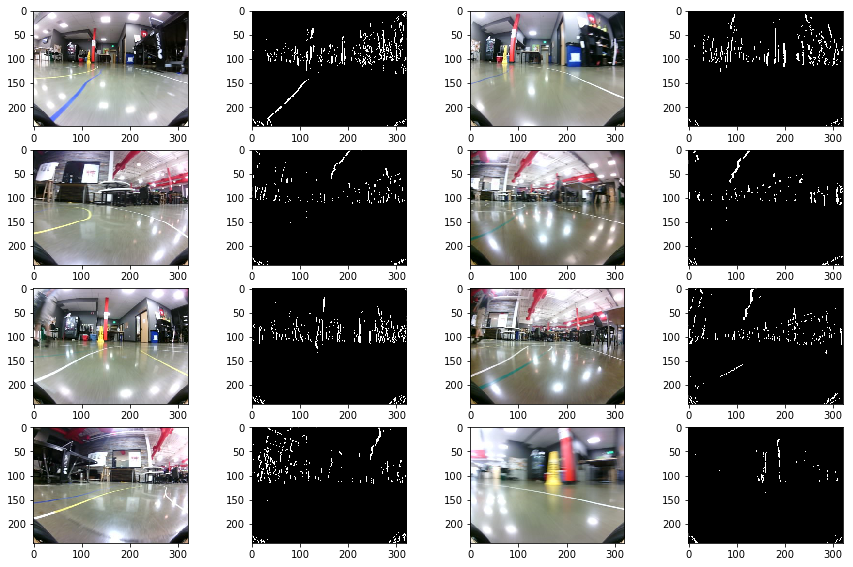

In [2]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
rows = len(img_paths)
cols = 4
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.Sobel(img, -1, 1, 0, ksize=3)
    img = img / 255.0
    img = img > 0.5
    plt.imshow(img[:,:,1], cmap='gray')
    i += 1

Horizontal Sobel

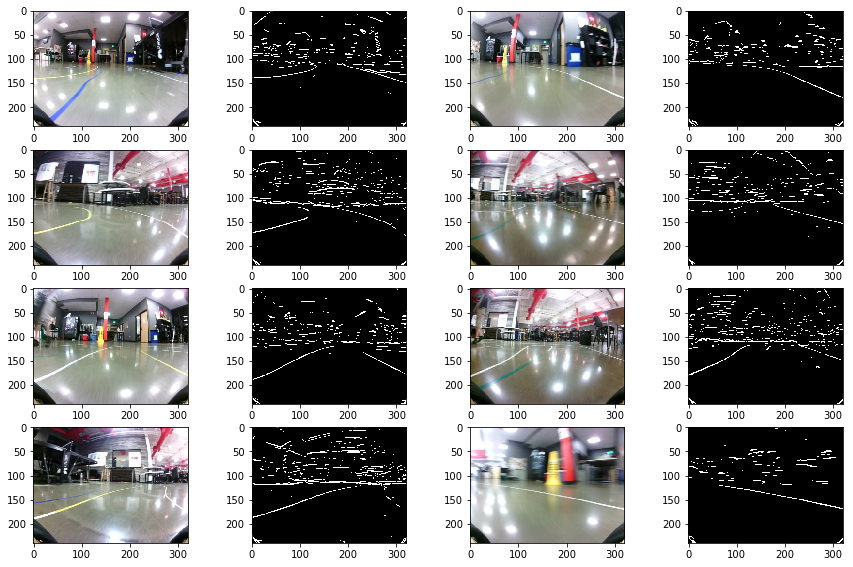

In [3]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
rows = len(img_paths)
cols = 4
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.Sobel(img, -1, 0, 1, ksize=3)
    img = img / 255.0
    img = img > 0.5
    plt.imshow(img[:,:,2], cmap='gray')
    i += 1

Magnitude

In [4]:
# img_paths = glob.glob('test_images/*.jpg')
# fig = plt.figure(figsize=(15, 20))
# rows = len(img_paths)
# cols = 4
# i = 1

# for img_path in img_paths:
#     ax = fig.add_subplot(rows, cols, i)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     i += 1

#     ax = fig.add_subplot(rows, cols, i)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     mag = np.sqrt(np.sum(list(map(lambda img: img**2, imgs)), axis=(0)))
#     scale_factor = np.max(mag) / 255
#     mag = (mag/scale_factor).astype(np.uint8)
#     mag = mag / 255.0
#     mag = mag > 0.5
#     plt.imshow(mag[:,:,2], cmap='gray')
#     i += 1
    


## Color Capture 1

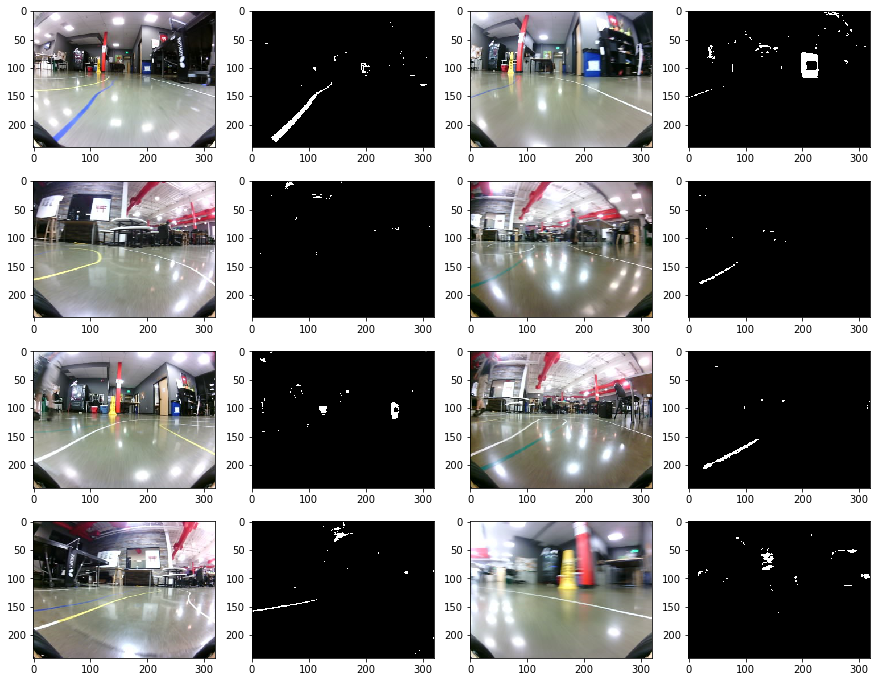

In [37]:
def find_color_hsv(change=None):
    inrange_min1 = inrange_min1_i.value
    inrange_min2 = inrange_min2_i.value
    inrange_min3 = inrange_min3_i.value
    inrange_max1 = inrange_max1_i.value
    inrange_max2 = inrange_max2_i.value
    inrange_max3 = inrange_max3_i.value
    
#     img_paths = ['test_images/test9.jpg', 'test_images/test8.jpg', 'test_images/test_from_course.jpg', 'test_images/test7.jpg', 'test_images/test4.jpg']
#     img_paths = ['test_images/test11.jpg', 'test_images/test12.jpg']
    img_paths = glob.glob('test_images/*.jpg')
    fig = plt.figure(figsize=(15, 12))
    cols = 4
    i_per_loop = 2
    rows = len(img_paths)*i_per_loop/cols
    i = 1

    for img_path in img_paths:
        ax = fig.add_subplot(rows, cols, i)
        img_raw = cv2.imread(img_path)
        img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        i += 1

        ax = fig.add_subplot(rows, cols, i)
        img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
#         img = cv2.inRange(img, (0, 72, 112), (69, 186, 145))

        img = cv2.inRange(img, (inrange_min1, inrange_min2, inrange_min3), (inrange_max1, inrange_max2, inrange_max3))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 0]
#         img = cv2.inRange(img, (inrange_min1), (inrange_max1))
        plt.imshow(img, cmap='gray')
        i += 1

    clear_output(True)

inrange_min1_i = IntSlider(description='inrange min 1', min=0, max=255, step=1, value=38)
inrange_min2_i = IntSlider(description='inrange min 2', min=0, max=255, step=1, value=61)
inrange_min3_i = IntSlider(description='inrange min 3', min=0, max=255, step=1, value=112)
inrange_max1_i = IntSlider(description='inrange max 1', min=1, max=255, step=1, value=139)
inrange_max2_i = IntSlider(description='inrange max 2', min=1, max=255, step=1, value=255)
inrange_max3_i = IntSlider(description='inrange max 3', min=1, max=255, step=1, value=255)

inrange_min1_i.observe(find_color_hsv, 'value')
inrange_min2_i.observe(find_color_hsv, 'value')
inrange_min3_i.observe(find_color_hsv, 'value')
inrange_max1_i.observe(find_color_hsv, 'value')
inrange_max2_i.observe(find_color_hsv, 'value')
inrange_max3_i.observe(find_color_hsv, 'value')

display(inrange_min1_i, inrange_min2_i, inrange_min3_i,
        inrange_max1_i, inrange_max2_i, inrange_max3_i)
find_color_hsv()

In [16]:
img

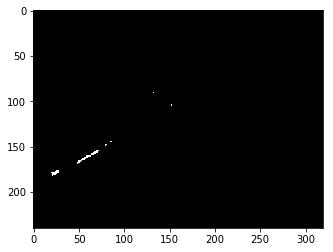

In [17]:
img = cv2.imread('test_images/green1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.inRange(img, (38, 72, 112), (95, 186, 145))
plt.imshow(img, cmap='gray')

# Sobel x + crop top

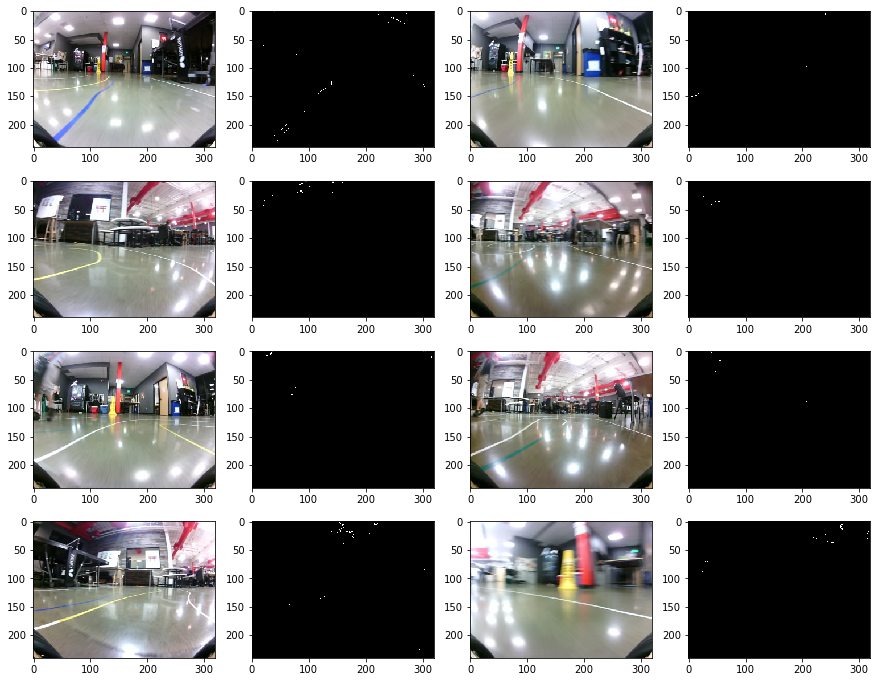

In [7]:
def find_color_rgb(change=None):
    inrange_min1 = inrange_min1_i.value
    inrange_min2 = inrange_min2_i.value
    inrange_min3 = inrange_min3_i.value
    inrange_max1 = inrange_max1_i.value
    inrange_max2 = inrange_max2_i.value
    inrange_max3 = inrange_max3_i.value
    
#     img_paths = ['test_images/test9.jpg', 'test_images/test8.jpg', 'test_images/test_from_course.jpg', 'test_images/test7.jpg', 'test_images/test4.jpg']
#     img_paths = ['test_images/test11.jpg', 'test_images/test12.jpg']
    img_paths = glob.glob('test_images/*.jpg')
    fig = plt.figure(figsize=(15, 12))
    cols = 4
    i_per_loop = 2
    rows = len(img_paths)*i_per_loop/cols
    i = 1
    for img_path in img_paths:
        ax = fig.add_subplot(rows, cols, i)
        img_raw = cv2.imread(img_path)
        img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        i += 1

        ax = fig.add_subplot(rows, cols, i)
        img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
        img = cv2.inRange(img, (inrange_min1, inrange_min2, inrange_min3), (inrange_max1, inrange_max2, inrange_max3))     
        plt.imshow(img, cmap='gray')
        i += 1

    clear_output(True)

inrange_min1_i = IntSlider(description='inrange min 1', min=0, max=255, step=1, value=130)
inrange_min2_i = IntSlider(description='inrange min 2', min=0, max=255, step=1, value=133)
inrange_min3_i = IntSlider(description='inrange min 3', min=0, max=255, step=1, value=175)
inrange_max1_i = IntSlider(description='inrange max 1', min=1, max=255, step=1, value=183)
inrange_max2_i = IntSlider(description='inrange max 2', min=1, max=255, step=1, value=151)
inrange_max3_i = IntSlider(description='inrange max 3', min=1, max=255, step=1, value=255)

inrange_min1_i.observe(find_color_rgb, 'value')
inrange_min2_i.observe(find_color_rgb, 'value')
inrange_min3_i.observe(find_color_rgb, 'value')
inrange_max1_i.observe(find_color_rgb, 'value')
inrange_max2_i.observe(find_color_rgb, 'value')
inrange_max3_i.observe(find_color_rgb, 'value')

display(inrange_min1_i, inrange_min2_i, inrange_min3_i,
        inrange_max1_i, inrange_max2_i, inrange_max3_i)
find_color_rgb()

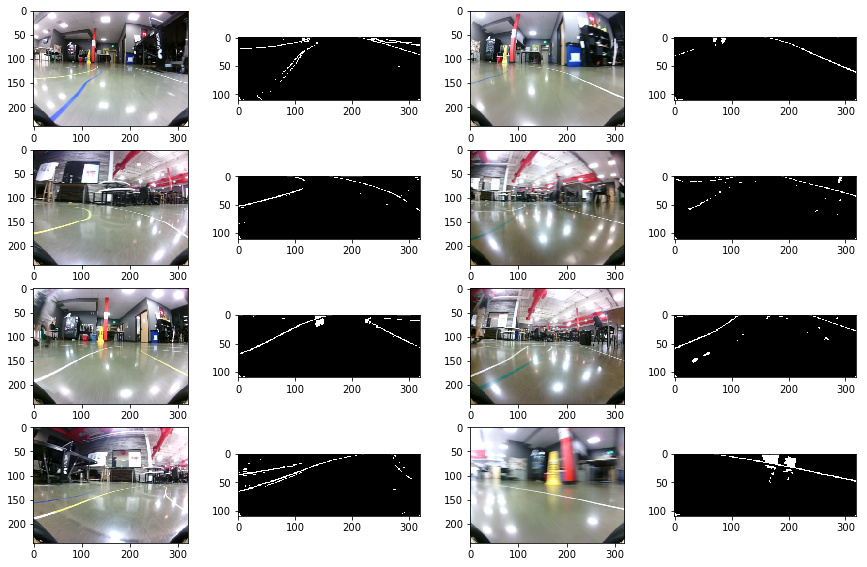

In [8]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
cols = 4
rows = len(img_paths)
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img_raw = cv2.imread(img_path)
    img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)
    
    img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)[:, :, 2]
    img = cv2.Sobel(img, -1, 0, 1, ksize=3)
    img = img / 255.0
    img = img > 0.5
    
#     img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
#     img1 = cv2.inRange(img1, (130, 133, 175), (183, 151, 255))
    img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
    img1 = cv2.inRange(img1, (0, 72, 132), (255, 180, 231))
    img1 = img1 / 255
    img1 = img1 > 0.1
    final_img = (img==1) | (img1==1)
    
    final_img = final_img[120:230, :]
    plt.imshow(final_img, cmap='gray')
    i += 1

# Sobel y layer 1 + Sobel x layer 2

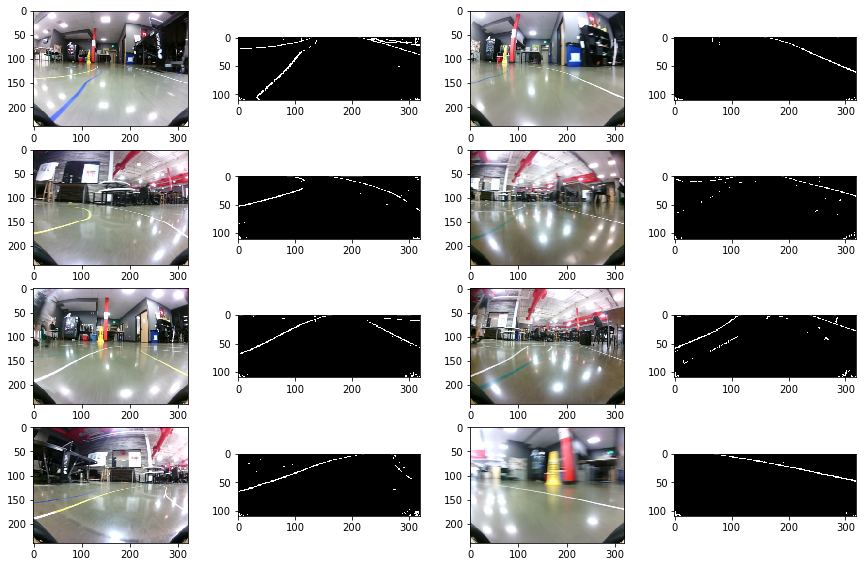

In [9]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
cols = 4
rows = len(img_paths)
i = 1

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img_raw = cv2.imread(img_path)
    img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)

    img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)[:, :, 1]
    img = cv2.Sobel(img, -1, 1, 0, ksize=3)
    img = img / 255.0
    img = img > 0.5
    
    img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)[:, :, 2]
    img1 = cv2.Sobel(img1, -1, 0, 1, ksize=3)
    img1 = img1 / 255.0
    img1 = img1 > 0.5
    
#     img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
#     img1 = cv2.inRange(img1, (130, 133, 175), (183, 151, 255))
#     img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
#     img1 = cv2.inRange(img1, (0, 72, 132), (255, 180, 231))
#     img1 = img1 / 255
#     img1 = img1 > 0.1

    final_img = (img==1) | (img1==1)
    
    final_img = final_img[120:230, :]
    plt.imshow(final_img, cmap='gray')
    i += 1

## Sobels and Color

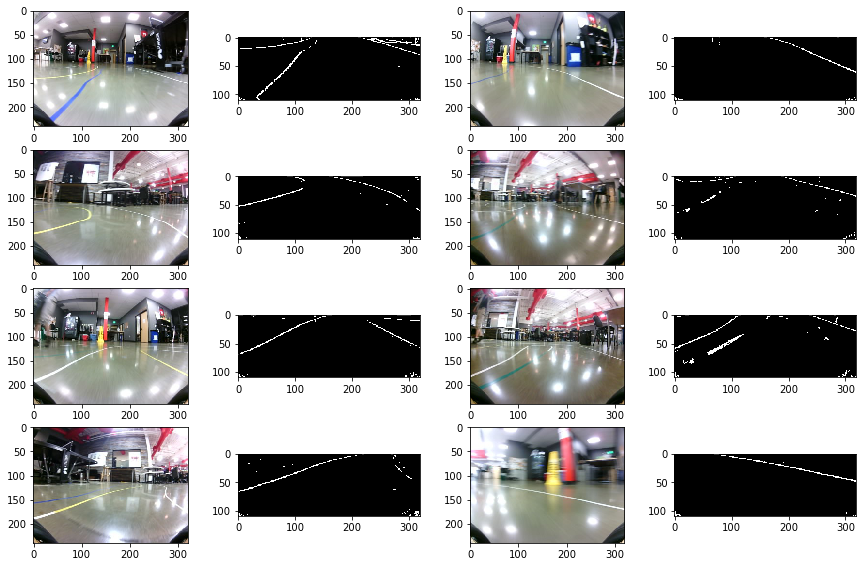

In [31]:
img_paths = glob.glob('test_images/*.jpg')
fig = plt.figure(figsize=(15, 20))
cols = 4
rows = len(img_paths)
i = 1

kernel = np.ones((3,3),np.uint8)

for img_path in img_paths:
    ax = fig.add_subplot(rows, cols, i)
    img_raw = cv2.imread(img_path)
    img_raw2 = np.copy(img_raw)
    img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    i += 1

    ax = fig.add_subplot(rows, cols, i)

    img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)[:, :, 1]
    img = cv2.Sobel(img, -1, 1, 0, ksize=3)
    img = img / 255.0
    img = img > 0.5
    
    img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)[:, :, 2]
    img1 = cv2.Sobel(img1, -1, 0, 1, ksize=3)
    img1 = img1 / 255.0
    img1 = img1 > 0.5
    
    img2 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
    img2 = cv2.inRange(img2, (38, 72, 112), (95, 186, 145))
    img2 = img2 / 255
    img2 = img2 > 0
    
#     img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
#     img1 = cv2.inRange(img1, (130, 133, 175), (183, 151, 255))
#     img1 = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
#     img1 = cv2.inRange(img1, (0, 72, 132), (255, 180, 231))
#     img1 = img1 / 255
#     img1 = img1 > 0.1

    final_img = (img==1) | (img1==1) | (img2==1)
    
    final_img = final_img[120:230, :]
        
    plt.imshow(final_img, cmap='gray')
    i += 1

## Opening Morphology

To remove the noise.

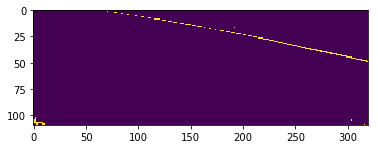

In [34]:
kernel = np.ones((2,2),np.uint8)

erosion = cv2.erode(np.array(final_img, dtype=np.uint8),kernel,iterations = 1)
plt.imshow(erosion)

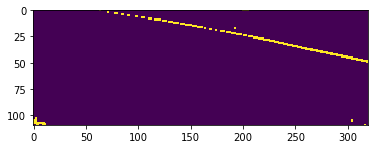

In [27]:
kernel = np.ones((2,2),np.uint8)
plt.imshow(cv2.morphologyEx(np.array(final_img, dtype=np.uint8), cv2.MORPH_OPEN, kernel))